In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker # τα ticks στους άξονες
import numpy as np

In [2]:
df=pd.read_excel('A0515_DKT87_TS_MM_01_1999_11_2022_06_F_GR.xls')

In [3]:
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [4]:
#df.tail(70)

In [5]:
# εξαγωγή του 2020
df20=df.iloc[359:374]
df20.reset_index(inplace=True) # Επαναρίθμηση του index
df20

,index,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,359,Έτος 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,360,Ομάδες αγαθών και υπηρεσιών,Ιαν.,Φεβρ.,Μαρτ.,Απρ.,Μάιος,Ιουν.,Ιουλ.,Αυγ.,Σεπτ.,Οκτ.,Νοέμ.,Δεκ.,Μέσος
2,361,1 Διατροφή και μη αλκοολούχα ποτά,100.294673,100.54413,99.936968,100.789824,100.278691,100.790355,98.94157,98.704679,99.835213,100.069161,100.319774,99.494961,100
3,362,2 Αλκοολούχα ποτά και καπνός,100.346864,99.837277,100.197918,99.666883,100.213064,100.37855,100.156281,100.279162,100.166654,99.920211,99.755234,99.081901,100
4,363,3 Ένδυση και υπόδηση,83.390343,77.63248,112.115039,112.614712,105.028998,109.368927,86.522305,81.3112,111.660007,112.363717,98.463887,109.528384,100
5,364,4 Στέγαση,104.263491,103.266542,101.835832,99.877442,98.803627,98.246341,98.256759,98.248797,98.318016,99.287063,99.497547,100.098541,100
6,365,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",100.790881,100.461344,101.054844,100.528977,100.640751,100.640496,99.228851,98.861383,99.923377,100.07,98.780743,99.018352,100
7,366,6 Υγεία,100.653563,100.494403,100.499278,100.369086,100.387096,100.405203,99.919044,99.562314,99.313098,99.404087,99.497254,99.495573,100
8,367,7 Μεταφορές,104.354683,104.662713,103.359508,100.623793,99.024247,97.889187,99.347726,98.281148,97.503442,98.594601,98.723984,97.634968,100
9,368,8 Επικοινωνίες,101.115441,100.669386,100.185292,99.643033,99.759084,99.676059,100.356524,100.124889,99.882496,99.646255,99.605366,99.336177,100


In [6]:
df20=df20.drop(columns=['index']) # Πέταμα της στήλης index που περιήχε το παλιό ndex
cols=df20[1:2].values.tolist()[0] # Εξαγωγή των τιμών της γραμμής 1 ώστε να ονομαστούν οι στήλες
# Δημιουργία λίστας με τα labels για τις στήλες
n_cols=[]
for value in cols:
    n_cols.append(value.strip())
df20=df20.drop(labels=[0, 1], axis=0) # σβήσιμο των labels των στηλών
df20.columns=n_cols # μετονομασία στηλών
df20.reset_index(inplace=True)
df20=df20.drop(columns=['index'])
df20

,Ομάδες αγαθών και υπηρεσιών,Ιαν.,Φεβρ.,Μαρτ.,Απρ.,Μάιος,Ιουν.,Ιουλ.,Αυγ.,Σεπτ.,Οκτ.,Νοέμ.,Δεκ.,Μέσος
0,1 Διατροφή και μη αλκοολούχα ποτά,100.294673,100.54413,99.936968,100.789824,100.278691,100.790355,98.94157,98.704679,99.835213,100.069161,100.319774,99.494961,100
1,2 Αλκοολούχα ποτά και καπνός,100.346864,99.837277,100.197918,99.666883,100.213064,100.37855,100.156281,100.279162,100.166654,99.920211,99.755234,99.081901,100
2,3 Ένδυση και υπόδηση,83.390343,77.63248,112.115039,112.614712,105.028998,109.368927,86.522305,81.3112,111.660007,112.363717,98.463887,109.528384,100
3,4 Στέγαση,104.263491,103.266542,101.835832,99.877442,98.803627,98.246341,98.256759,98.248797,98.318016,99.287063,99.497547,100.098541,100
4,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",100.790881,100.461344,101.054844,100.528977,100.640751,100.640496,99.228851,98.861383,99.923377,100.07,98.780743,99.018352,100
5,6 Υγεία,100.653563,100.494403,100.499278,100.369086,100.387096,100.405203,99.919044,99.562314,99.313098,99.404087,99.497254,99.495573,100
6,7 Μεταφορές,104.354683,104.662713,103.359508,100.623793,99.024247,97.889187,99.347726,98.281148,97.503442,98.594601,98.723984,97.634968,100
7,8 Επικοινωνίες,101.115441,100.669386,100.185292,99.643033,99.759084,99.676059,100.356524,100.124889,99.882496,99.646255,99.605366,99.336177,100
8,"9 Αναψυχή, πολιτιστικές δραστηριότητες",100.53325,100.04204,100.104139,100.283452,100.208478,100.194381,99.8821,99.692644,99.744677,99.75508,99.57684,99.982919,100
9,10 Εκπαίδευση,100.011489,100.011489,100.011489,100.011489,100.011489,100.011489,100.011489,100.011489,99.92579,99.994101,99.994101,99.994101,100


In [7]:
# αντιμετάθεση των γραμμών με τις στήλες
df20_t = df20.transpose()
df20_t

,0,1,2,3,4,5,6,7,8,9,10,11,12
Ομάδες αγαθών και υπηρεσιών,1 Διατροφή και μη αλκοολούχα ποτά,2 Αλκοολούχα ποτά και καπνός,3 Ένδυση και υπόδηση,4 Στέγαση,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",6 Υγεία,7 Μεταφορές,8 Επικοινωνίες,"9 Αναψυχή, πολιτιστικές δραστηριότητες",10 Εκπαίδευση,"11 Ξενοδοχεία, καφέ, εστιατόρια",12 Άλλα αγαθά και υπηρεσίες,Γενικός Δείκτης
Ιαν.,100.294673,100.346864,83.390343,104.263491,100.790881,100.653563,104.354683,101.115441,100.53325,100.011489,99.983851,100.923909,100.493161
Φεβρ.,100.54413,99.837277,77.63248,103.266542,100.461344,100.494403,104.662713,100.669386,100.04204,100.011489,99.846112,100.693208,99.991152
Μαρτ.,99.936968,100.197918,112.115039,101.835832,101.054844,100.499278,103.359508,100.185292,100.104139,100.011489,99.974579,100.606964,101.573429
Απρ.,100.789824,99.666883,112.614712,99.877442,100.528977,100.369086,100.623793,99.643033,100.283452,100.011489,100.327952,100.744044,101.110033
Μάιος,100.278691,100.213064,105.028998,98.803627,100.640751,100.387096,99.024247,99.759084,100.208478,100.011489,101.102328,100.653719,100.288282
Ιουν.,100.790355,100.37855,109.368927,98.246341,100.640496,100.405203,97.889187,99.676059,100.194381,100.011489,100.434434,100.40969,100.332615
Ιουλ.,98.94157,100.156281,86.522305,98.256759,99.228851,99.919044,99.347726,100.356524,99.8821,100.011489,100.229901,99.713824,98.625085
Αυγ.,98.704679,100.279162,81.3112,98.248797,98.861383,99.562314,98.281148,100.124889,99.692644,100.011489,99.872618,99.233021,97.986551
Σεπτ.,99.835213,100.166654,111.660007,98.318016,99.923377,99.313098,97.503442,99.882496,99.744677,99.92579,99.869095,99.70714,99.979282


In [8]:
cols=df20_t[0:1].values.tolist()[0] # Εξαγωγή των τιμών της γραμμής 0 ώστε να ονομαστούν οι στήλες
# Δημιουργία λίστας με τα labels για τις στήλες
n_cols=[]
for value in cols:
    n_cols.append(value)
df20_t=df20_t.drop(df20_t.index[0]) # σβήσιμο των labels των στηλών
df20_t.columns=n_cols # μετονομασία στηλών
df20_t

,1 Διατροφή και μη αλκοολούχα ποτά,2 Αλκοολούχα ποτά και καπνός,3 Ένδυση και υπόδηση,4 Στέγαση,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",6 Υγεία,7 Μεταφορές,8 Επικοινωνίες,"9 Αναψυχή, πολιτιστικές δραστηριότητες",10 Εκπαίδευση,"11 Ξενοδοχεία, καφέ, εστιατόρια",12 Άλλα αγαθά και υπηρεσίες,Γενικός Δείκτης
Ιαν.,100.294673,100.346864,83.390343,104.263491,100.790881,100.653563,104.354683,101.115441,100.53325,100.011489,99.983851,100.923909,100.493161
Φεβρ.,100.54413,99.837277,77.63248,103.266542,100.461344,100.494403,104.662713,100.669386,100.04204,100.011489,99.846112,100.693208,99.991152
Μαρτ.,99.936968,100.197918,112.115039,101.835832,101.054844,100.499278,103.359508,100.185292,100.104139,100.011489,99.974579,100.606964,101.573429
Απρ.,100.789824,99.666883,112.614712,99.877442,100.528977,100.369086,100.623793,99.643033,100.283452,100.011489,100.327952,100.744044,101.110033
Μάιος,100.278691,100.213064,105.028998,98.803627,100.640751,100.387096,99.024247,99.759084,100.208478,100.011489,101.102328,100.653719,100.288282
Ιουν.,100.790355,100.37855,109.368927,98.246341,100.640496,100.405203,97.889187,99.676059,100.194381,100.011489,100.434434,100.40969,100.332615
Ιουλ.,98.94157,100.156281,86.522305,98.256759,99.228851,99.919044,99.347726,100.356524,99.8821,100.011489,100.229901,99.713824,98.625085
Αυγ.,98.704679,100.279162,81.3112,98.248797,98.861383,99.562314,98.281148,100.124889,99.692644,100.011489,99.872618,99.233021,97.986551
Σεπτ.,99.835213,100.166654,111.660007,98.318016,99.923377,99.313098,97.503442,99.882496,99.744677,99.92579,99.869095,99.70714,99.979282
Οκτ.,100.069161,99.920211,112.363717,99.287063,100.07,99.404087,98.594601,99.646255,99.75508,99.994101,99.641295,99.714635,100.327985


In [9]:
# εξαγωγή του 2021
df21=df.iloc[376:391]
df21.reset_index(inplace=True) # Επαναρίθμηση του index
df21=df21.drop(columns=['index'])  # Πέταμα της στήλης index που περιήχε το παλιό ndex
cols=df21[1:2].values.tolist()[0]  # Εξαγωγή των τιμών της γραμμής 1 ώστε να ονομαστούν οι στήλες
# Δημιουργία λίστας με τα labels για τις στήλες
n_cols=[]
for value in cols:
    n_cols.append(value.strip())
df21=df21.drop(labels=[0, 1], axis=0) # σβήσιμο των labels των στηλών
df21.columns=n_cols # μετονομασία στηλών
df21.reset_index(inplace=True)
df21=df21.drop(columns=['index'])
df21

,Ομάδες αγαθών και υπηρεσιών,Ιαν.,Φεβρ.,Μαρτ.,Απρ.,Μάιος,Ιουν.,Ιουλ.,Αυγ.,Σεπτ.,Οκτ.,Νοέμ.,Δεκ.,Μέσος
0,1 Διατροφή και μη αλκοολούχα ποτά,99.859076,100.053911,99.67733,99.588133,100.125039,101.173391,100.596102,101.690727,102.918934,103.03846,103.824948,103.787421,101.361123
1,2 Αλκοολούχα ποτά και καπνός,99.973779,99.976123,99.681525,99.584615,99.899351,100.170862,100.153461,99.909189,100.076933,99.951648,99.656311,99.112595,99.845533
2,3 Ένδυση και υπόδηση,80.510983,77.588184,93.137587,111.430321,99.748735,109.906683,85.316339,79.174511,111.157451,112.867301,102.286195,112.784308,97.992383
3,4 Στέγαση,100.74398,101.32558,101.908919,101.813362,101.956427,102.202501,102.344259,102.595786,102.930424,110.927788,117.100604,118.067768,105.32645
4,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",98.579419,98.256815,99.337161,99.292224,99.259386,99.786446,98.493803,98.412031,100.516665,100.879718,101.099658,101.302367,99.601308
5,6 Υγεία,99.493806,99.43109,99.429169,99.410891,99.100036,99.072117,99.1138,99.110829,99.366772,99.436146,99.412879,99.409422,99.31558
6,7 Μεταφορές,98.386692,100.177771,102.535847,102.973483,103.574866,104.48686,105.156814,104.826171,105.08169,107.644332,107.907621,108.229948,104.248508
7,8 Επικοινωνίες,99.029461,98.823308,98.578254,98.275898,98.103182,97.90937,97.688929,97.557758,97.34283,97.171458,96.935079,96.809322,97.852071
8,"9 Αναψυχή, πολιτιστικές δραστηριότητες",99.898047,99.775776,99.802547,99.288518,99.379852,99.226122,99.103829,99.016085,99.391074,99.356447,99.280184,99.371415,99.407491
9,10 Εκπαίδευση,99.994101,99.994101,99.994101,99.994104,100.010982,100.034417,100.034417,100.034417,100.862257,100.918488,100.930575,100.930575,100.311044


In [10]:
# εξαγωγή του 2022
df22=df.iloc[393:]
df22.reset_index(inplace=True) # Επαναρίθμηση του index
df22=df22.drop(columns=['index'])  # Πέταμα της στήλης index που περιήχε το παλιό ndex
cols=df22[1:2].values.tolist()[0]  # Εξαγωγή των τιμών της γραμμής 1 ώστε να ονομαστούν οι στήλες
# Δημιουργία λίστας με τα labels για τις στήλες
n_cols=[]
for value in cols:
    n_cols.append(value.strip())
df22=df22.drop(labels=[0, 1], axis=0) # σβήσιμο των labels των στηλών
df22.columns=n_cols # μετονομασία στηλών
df22.reset_index(inplace=True)
df22=df22.drop(columns=['index'])
df22

,Ομάδες αγαθών και υπηρεσιών,Ιαν.,Φεβρ.,Μαρτ.,Απρ.,Μάιος,Ιουν.,Ιουλ.,Αυγ.,Σεπτ.,Οκτ.,Νοέμ.,Δεκ.,Μέσος
0,1 Διατροφή και μη αλκοολούχα ποτά,105.051633,107.145156,107.735352,110.473707,112.192585,113.877887,113.715194,115.147799,116.795187,118.291223,119.414976,119.849703,113.307534
1,2 Αλκοολούχα ποτά και καπνός,99.830835,99.762305,100.108142,99.573775,100.793626,101.054439,101.617738,101.700611,102.058368,102.157288,102.436488,101.558178,101.054316
2,3 Ένδυση και υπόδηση,86.122921,81.924635,99.192144,113.190014,105.383582,114.986409,88.185935,81.327466,115.009622,118.979213,113.39448,118.888706,103.048761
3,4 Στέγαση,123.503264,127.070291,132.407178,137.683235,137.631387,134.376925,133.920355,134.838341,139.396181,123.338994,122.716615,121.055205,130.661498
4,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",101.500218,102.252343,103.062272,103.481272,104.358158,106.30314,106.522404,107.776079,109.86879,111.603232,112.267571,112.750497,106.812165
5,6 Υγεία,99.429238,99.395904,99.394697,99.447471,99.599839,99.631167,99.787106,101.816493,102.133418,102.159347,102.217795,102.221329,100.602817
6,7 Μεταφορές,109.266273,112.419153,118.374742,118.783137,123.034656,130.640089,126.81614,121.631953,119.981022,122.487742,123.581089,117.942175,120.413181
7,8 Επικοινωνίες,95.827255,95.766688,95.708429,95.576632,95.685284,95.686057,95.62299,95.44829,95.296126,95.180999,94.94539,94.796763,95.461742
8,"9 Αναψυχή, πολιτιστικές δραστηριότητες",99.409922,99.377478,99.908866,100.493944,100.69379,100.924737,101.038698,101.3211,101.485293,101.842536,101.929167,102.530355,100.91299
9,10 Εκπαίδευση,100.930575,100.930575,100.930575,100.930575,100.930575,100.930575,100.930575,100.930575,102.706826,102.971519,103.102153,103.115178,101.61169


Text(0.5, 1.0, '1  Διατροφή και μη αλκοολούχα ποτά')

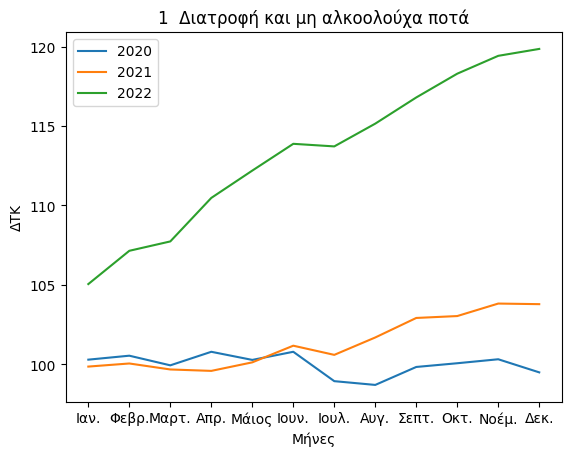

In [11]:
# γραφήματα για την κατηγορία Διατροφή και μη αλκοολούχα ποτά, ανα μήνα και έτος
data20=df20.iloc[0, 1:13]
data21=df21.iloc[0, 1:13]
data22=df22.iloc[0, 1:13]
plt.plot(data20)
plt.plot(data21)
plt.plot(data22)
plt.xlabel('Μήνες')
plt.ylabel('ΔΤΚ')
plt.legend(['2020', '2021', '2022'])
# plt.title('Διατροφή και μη αλκοολούχα ποτά')
plot_title = df20.iloc[0, 0:1].values[0].strip() # Εξαγωγή του τίτλου από το df
plt.title(plot_title)

Text(0.5, 1.0, 'Γενικός Δείκτης')

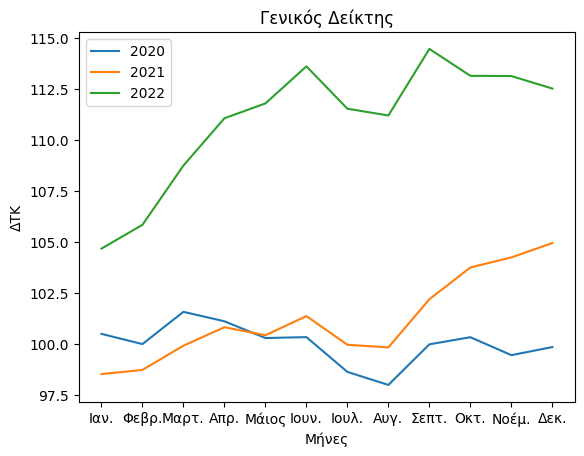

In [12]:
# γραφήματα για το γενικό δείκτη, ανα μήνα και έτος
data20=df20.iloc[12, 1:13]
data21=df21.iloc[12, 1:13]
data22=df22.iloc[12, 1:13]
plt.plot(data20)
plt.plot(data21)
plt.plot(data22)
plt.xlabel('Μήνες')
plt.ylabel('ΔΤΚ')
plt.legend(['2020', '2021', '2022'])
# plt.title('Γενικός Δείκτης')
plot_title = df20.iloc[-1, 0:1].values[0].strip() # EΕγαγωγή του τίτλου από το df
plt.title(plot_title)

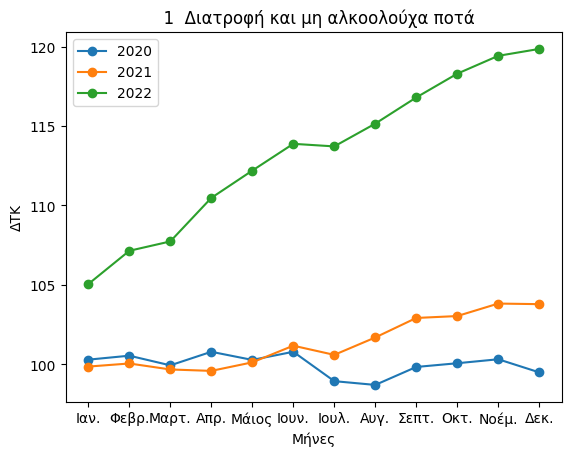

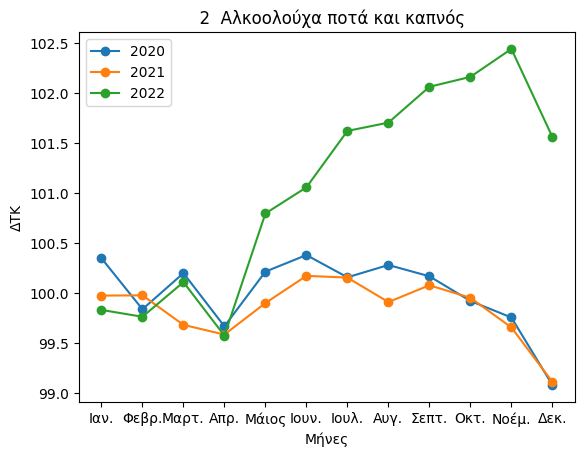

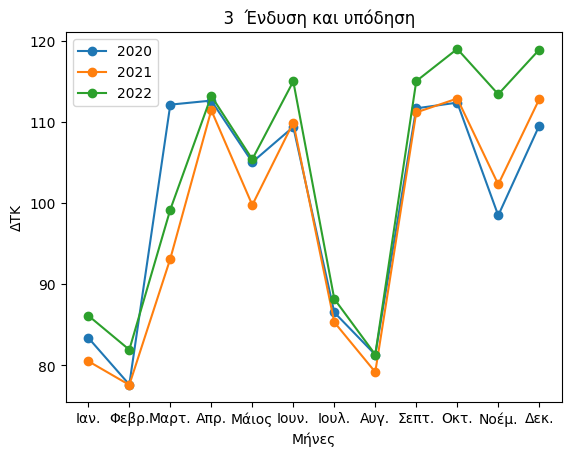

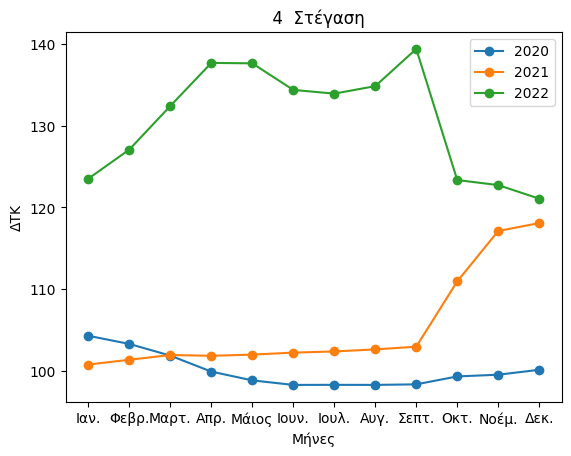

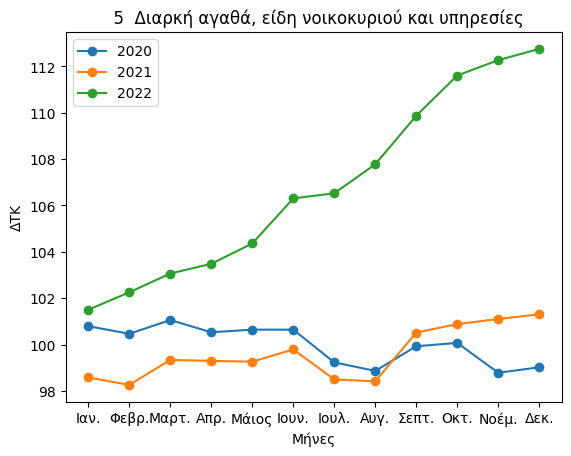

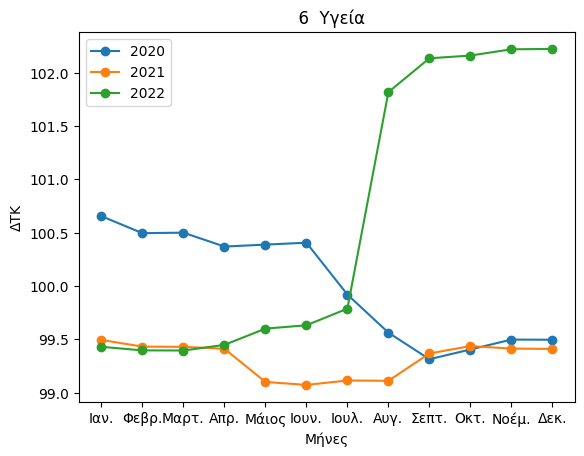

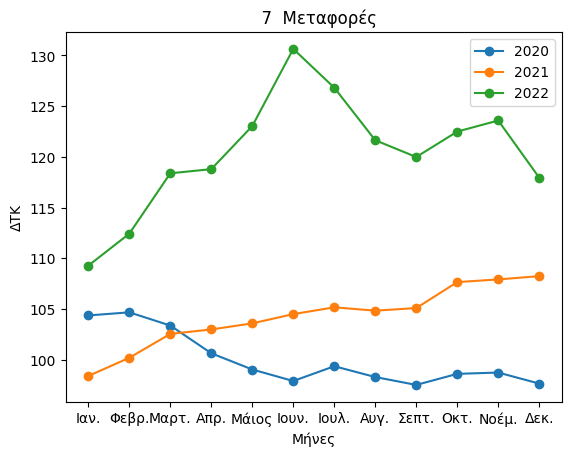

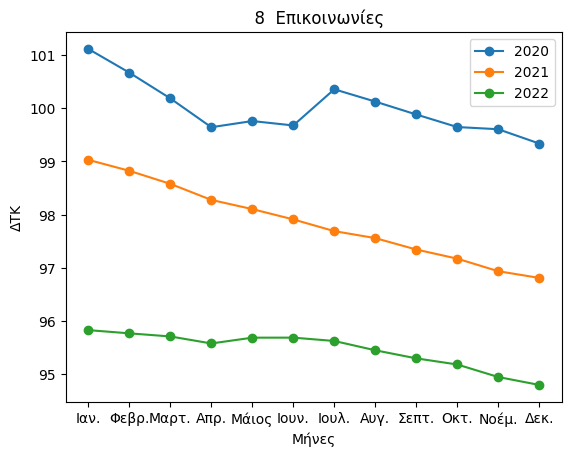

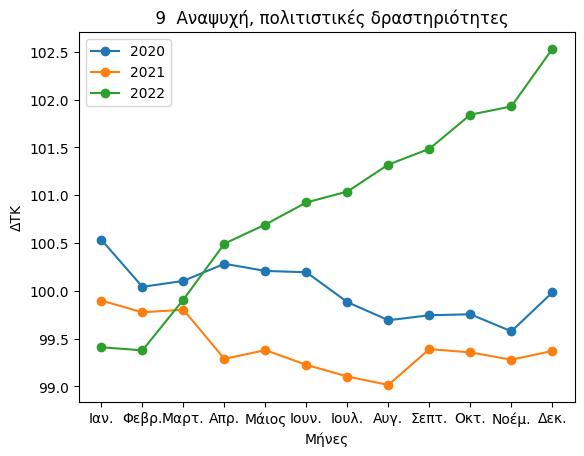

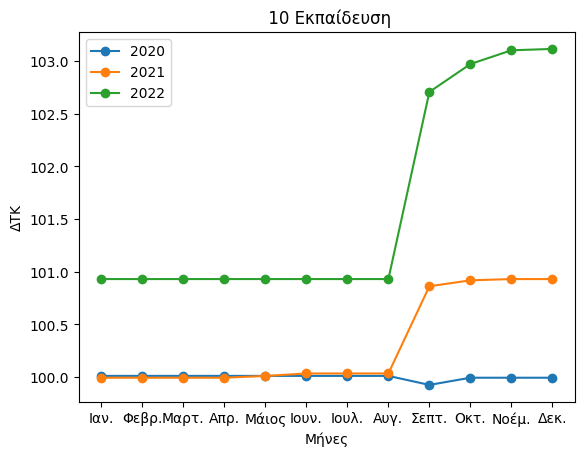

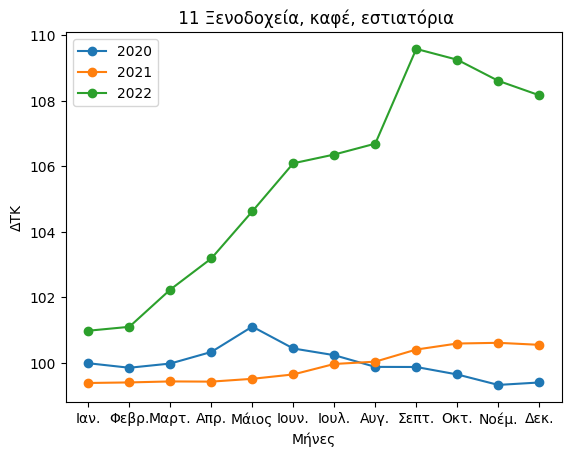

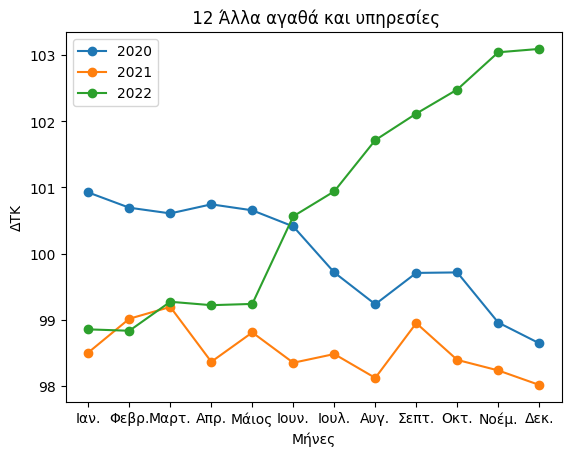

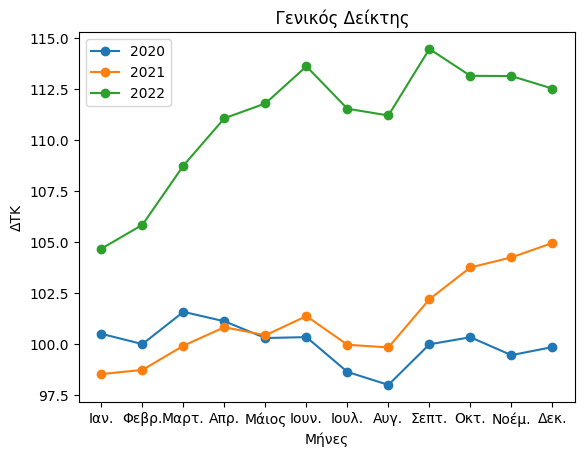

In [13]:
#γράφημα για όλες τις κατηγορίες 
for i in range(13):
    data20=df20.iloc[i, 1:13]
    data21=df21.iloc[i, 1:13]
    data22=df22.iloc[i, 1:13]
    plt.plot(data20, 'o-')
    plt.plot(data21, 'o-')
    plt.plot(data22, 'o-')
    plt.xlabel('Μήνες')
    plt.ylabel('ΔΤΚ')
    plt.legend(['2020', '2021', '2022'])
    plt.title(list(df20['Ομάδες αγαθών και υπηρεσιών'].values)[i])
    plt.savefig('Image_'+str(i+1)+'.png', dpi=300) #  αποθήκευση σε εικόνα (default=.png)
    plt.show() # reset ώστε κάθε διάγραμμα να είναι σε νέους άξονες

In [14]:
# df20

In [15]:
# Συγχώνευση df20, df21, df22
# Μετονομασία στηλών, να περιέχει την χρονολογία
# έτος 2020
df20a = df20
cols=list(df20[1:2].columns)
n_cols=[cols[0]]
for value in cols[1:]:
    n_cols.append(value+'20')
df20a.columns=n_cols
# έτος 2021
df21a = df21
cols=list(df21[1:2].columns)
n_cols=[cols[0]]
for value in cols[1:]:
    n_cols.append(value+'21')
df21a.columns=n_cols
# έτος 2022
df22a = df22
cols=list(df22[1:2].columns)
n_cols=[cols[0]]
for value in cols[1:]:
    n_cols.append(value+'22')
df22a.columns=n_cols
# ένωση df20a, df21a, df22a
df_mrg = pd.merge(df20a, df21a)
df_mrg = pd.merge(df_mrg, df22a)
df_mrg = df_mrg.drop(columns=['Μέσος20', 'Μέσος21', 'Μέσος22']) # Διαγραφή στηλών, δεν έχουν νόημα σ' αυτό το διάγραμμα

In [16]:
df_mrg.head(3)

,Ομάδες αγαθών και υπηρεσιών,Ιαν.20,Φεβρ.20,Μαρτ.20,Απρ.20,Μάιος20,Ιουν.20,Ιουλ.20,Αυγ.20,Σεπτ.20,...,Μαρτ.22,Απρ.22,Μάιος22,Ιουν.22,Ιουλ.22,Αυγ.22,Σεπτ.22,Οκτ.22,Νοέμ.22,Δεκ.22
0,1 Διατροφή και μη αλκοολούχα ποτά,100.294673,100.54413,99.936968,100.789824,100.278691,100.790355,98.94157,98.704679,99.835213,...,107.735352,110.473707,112.192585,113.877887,113.715194,115.147799,116.795187,118.291223,119.414976,119.849703
1,2 Αλκοολούχα ποτά και καπνός,100.346864,99.837277,100.197918,99.666883,100.213064,100.37855,100.156281,100.279162,100.166654,...,100.108142,99.573775,100.793626,101.054439,101.617738,101.700611,102.058368,102.157288,102.436488,101.558178
2,3 Ένδυση και υπόδηση,83.390343,77.63248,112.115039,112.614712,105.028998,109.368927,86.522305,81.3112,111.660007,...,99.192144,113.190014,105.383582,114.986409,88.185935,81.327466,115.009622,118.979213,113.39448,118.888706


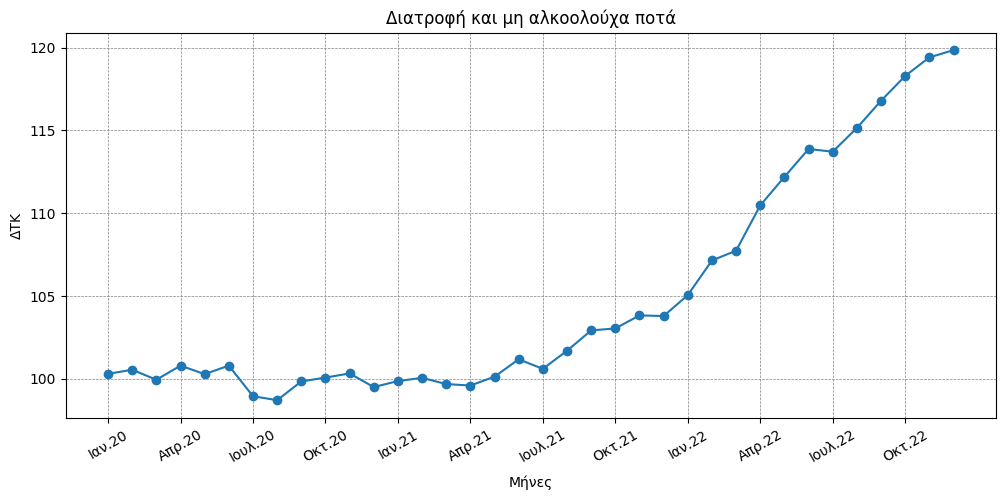

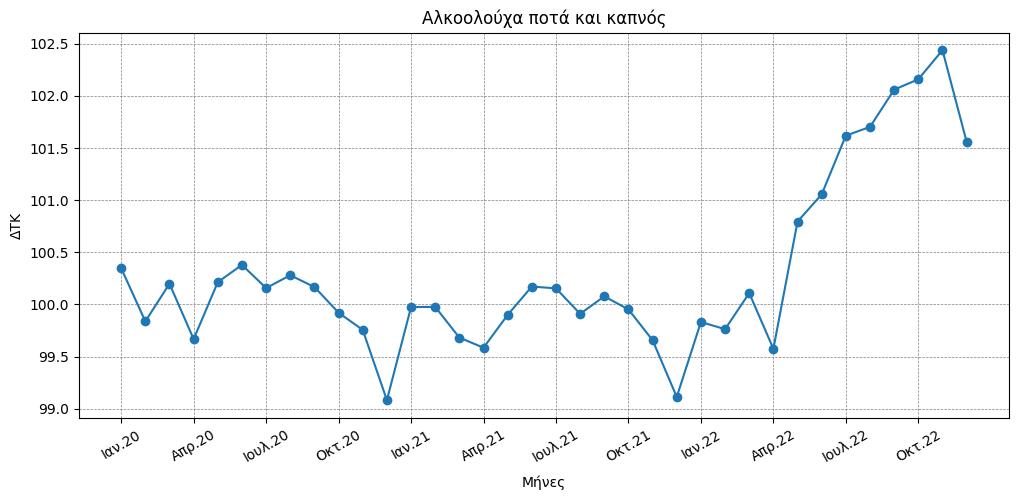

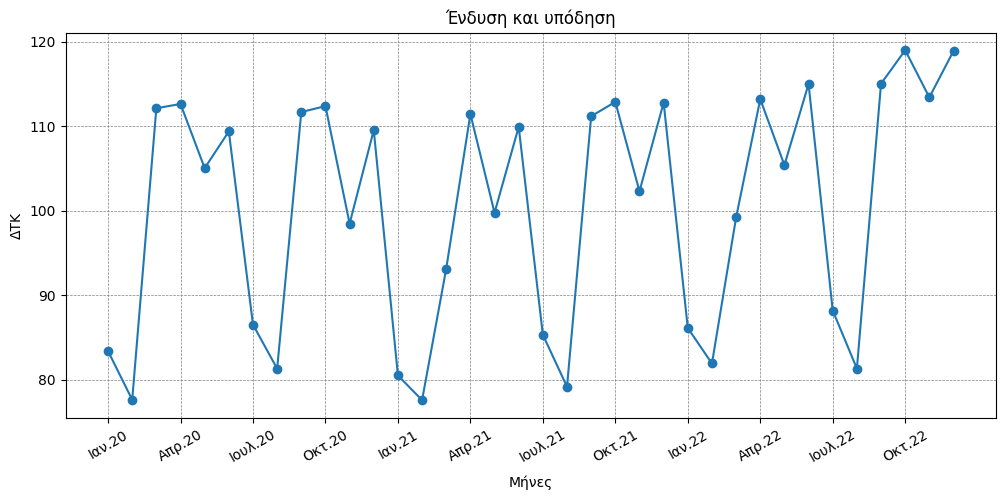

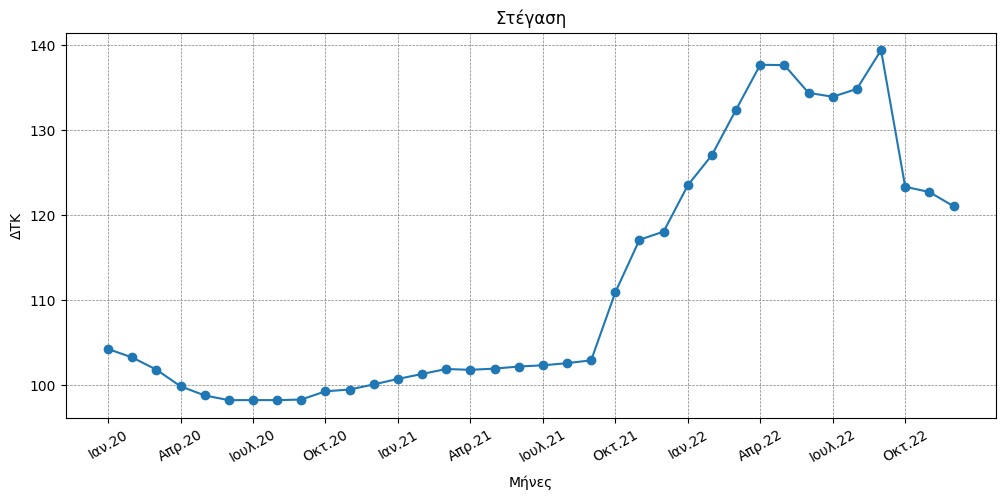

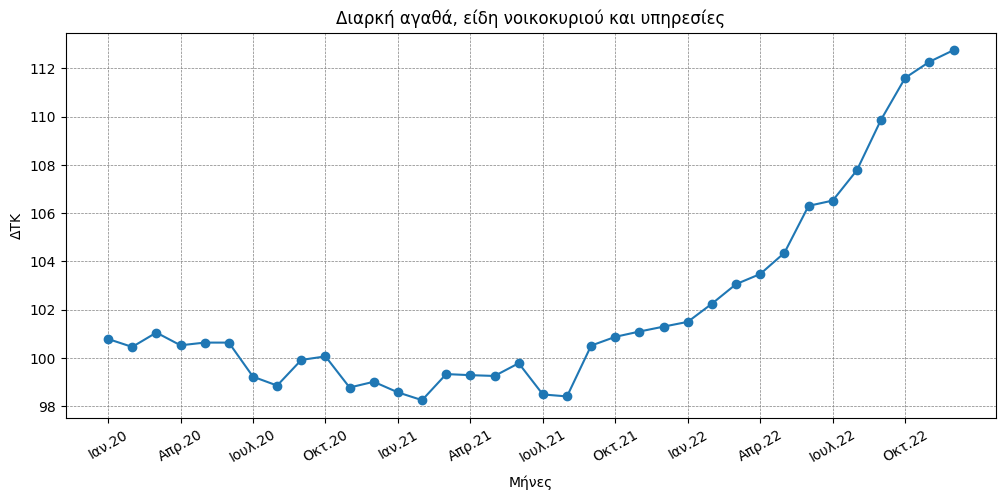

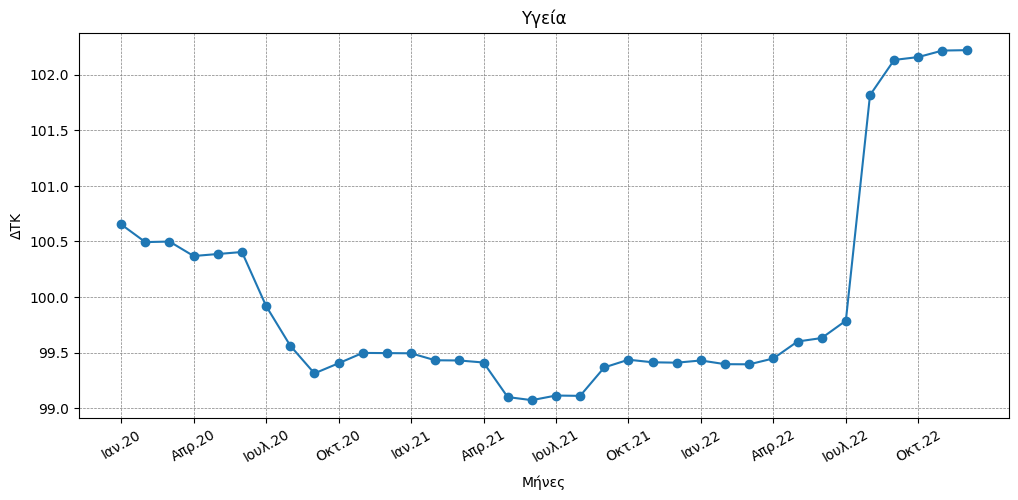

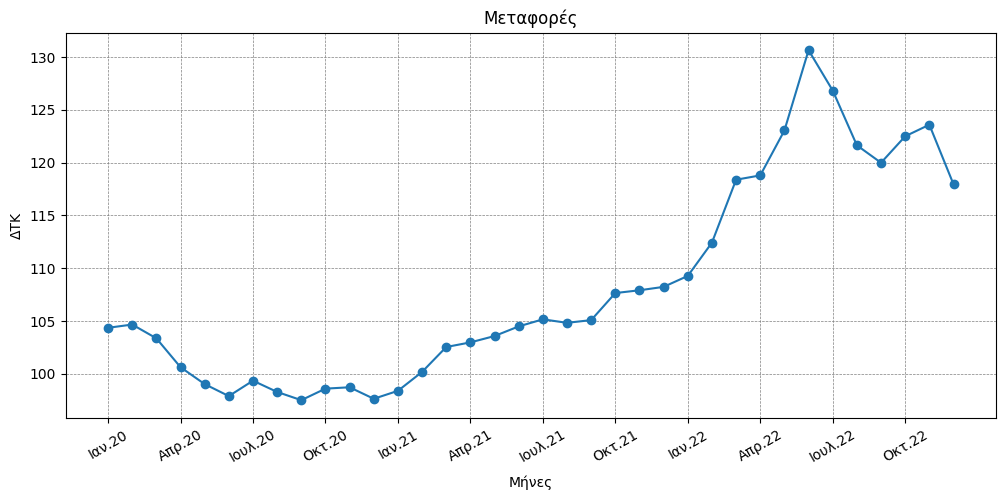

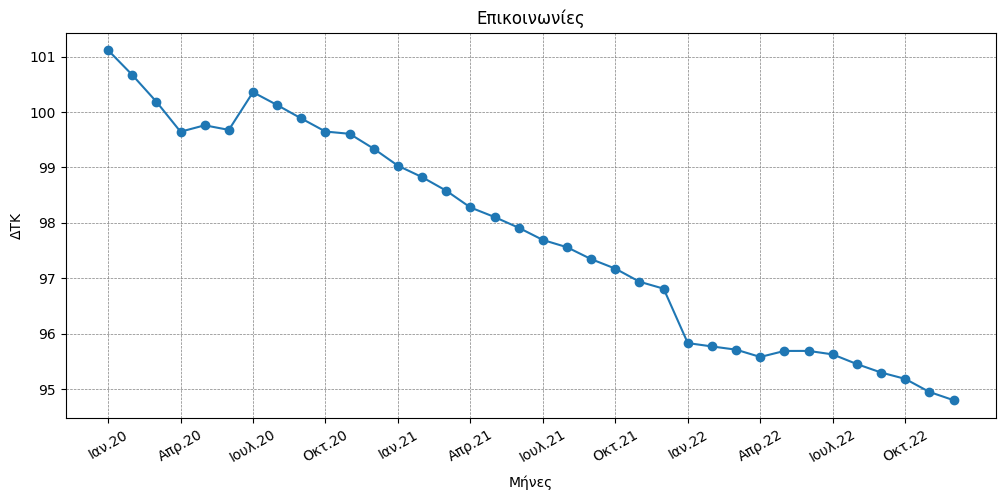

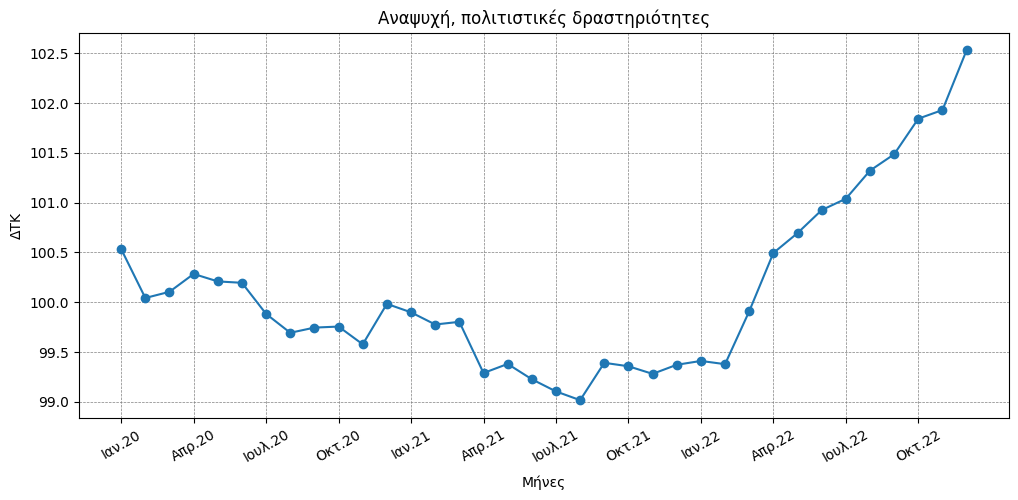

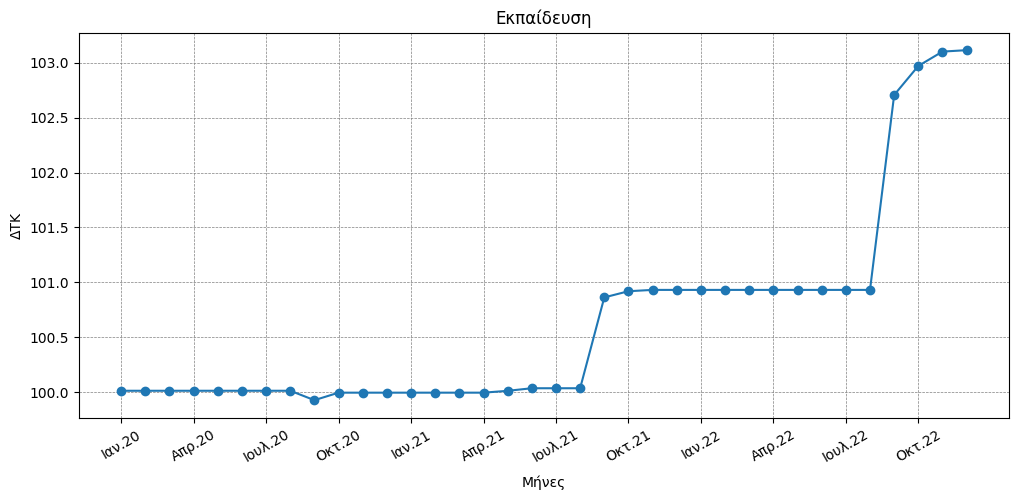

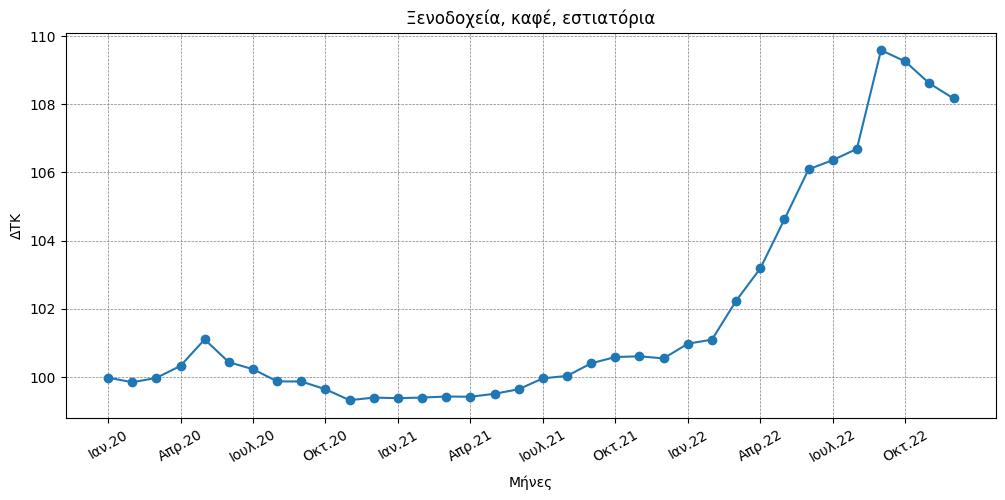

In [17]:
# Δημιουργία ενός γραφήματος για τα έτη 2020,2021, 2022, όχι συγκριτικά, αλλά σε χρονολογική σειρά
titles=list(df_mrg['Ομάδες αγαθών και υπηρεσιών'].values)
titles=[title.strip().split(' ', 1)[1].strip() for title in titles]  # Αφαίρεση του αριθμού από τον τίτλο
for i in range(11):
    plt.figure(figsize=(12,5))
    data=df_mrg.iloc[i, 1:37]
    ax = plt.gca()
    plt.plot(data, 'o-')
    plt.xlabel('Μήνες')
    plt.ylabel('ΔΤΚ')
    plt.title(titles[i])
    xticks = ax.xaxis.get_major_ticks()
    every_nth = 3
    for n in range(len(xticks)):
        if n % every_nth != 0:
            xticks[n].set_visible(False)
    plt.tick_params(axis='x', labelrotation=30)
    for label in ax.get_xticklabels():
        label.set_horizontalalignment('center')
    plt.grid(axis='both', color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.savefig('Image_mrg_'+str(i+1)+'-A.png', dpi=300)
    plt.show()

In [18]:
df_mrg_t = df_mrg.transpose() # αντιμετάθεση των γραμμών με τις στήλες
df_mrg_t

,0,1,2,3,4,5,6,7,8,9,10,11,12
Ομάδες αγαθών και υπηρεσιών,1 Διατροφή και μη αλκοολούχα ποτά,2 Αλκοολούχα ποτά και καπνός,3 Ένδυση και υπόδηση,4 Στέγαση,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",6 Υγεία,7 Μεταφορές,8 Επικοινωνίες,"9 Αναψυχή, πολιτιστικές δραστηριότητες",10 Εκπαίδευση,"11 Ξενοδοχεία, καφέ, εστιατόρια",12 Άλλα αγαθά και υπηρεσίες,Γενικός Δείκτης
Ιαν.20,100.294673,100.346864,83.390343,104.263491,100.790881,100.653563,104.354683,101.115441,100.53325,100.011489,99.983851,100.923909,100.493161
Φεβρ.20,100.54413,99.837277,77.63248,103.266542,100.461344,100.494403,104.662713,100.669386,100.04204,100.011489,99.846112,100.693208,99.991152
Μαρτ.20,99.936968,100.197918,112.115039,101.835832,101.054844,100.499278,103.359508,100.185292,100.104139,100.011489,99.974579,100.606964,101.573429
Απρ.20,100.789824,99.666883,112.614712,99.877442,100.528977,100.369086,100.623793,99.643033,100.283452,100.011489,100.327952,100.744044,101.110033
Μάιος20,100.278691,100.213064,105.028998,98.803627,100.640751,100.387096,99.024247,99.759084,100.208478,100.011489,101.102328,100.653719,100.288282
Ιουν.20,100.790355,100.37855,109.368927,98.246341,100.640496,100.405203,97.889187,99.676059,100.194381,100.011489,100.434434,100.40969,100.332615
Ιουλ.20,98.94157,100.156281,86.522305,98.256759,99.228851,99.919044,99.347726,100.356524,99.8821,100.011489,100.229901,99.713824,98.625085
Αυγ.20,98.704679,100.279162,81.3112,98.248797,98.861383,99.562314,98.281148,100.124889,99.692644,100.011489,99.872618,99.233021,97.986551
Σεπτ.20,99.835213,100.166654,111.660007,98.318016,99.923377,99.313098,97.503442,99.882496,99.744677,99.92579,99.869095,99.70714,99.979282


In [19]:
cols=df_mrg_t[0:1].values.tolist()[0] # Εξαγωγή των τιμών της γραμμής 0 ώστε να ονομαστούν οι στήλες
# Δημιουργία λίστας με τα labels για τις στήλες
n_cols=[]
for value in cols:
    n_cols.append(value)
df_mrg_t=df_mrg_t.drop(df_mrg_t.index[0]) # σβήσιμο των labels των στηλών
df_mrg_t.columns=n_cols # μετονομασία στηλών
df_mrg_t

,1 Διατροφή και μη αλκοολούχα ποτά,2 Αλκοολούχα ποτά και καπνός,3 Ένδυση και υπόδηση,4 Στέγαση,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",6 Υγεία,7 Μεταφορές,8 Επικοινωνίες,"9 Αναψυχή, πολιτιστικές δραστηριότητες",10 Εκπαίδευση,"11 Ξενοδοχεία, καφέ, εστιατόρια",12 Άλλα αγαθά και υπηρεσίες,Γενικός Δείκτης
Ιαν.20,100.294673,100.346864,83.390343,104.263491,100.790881,100.653563,104.354683,101.115441,100.53325,100.011489,99.983851,100.923909,100.493161
Φεβρ.20,100.54413,99.837277,77.63248,103.266542,100.461344,100.494403,104.662713,100.669386,100.04204,100.011489,99.846112,100.693208,99.991152
Μαρτ.20,99.936968,100.197918,112.115039,101.835832,101.054844,100.499278,103.359508,100.185292,100.104139,100.011489,99.974579,100.606964,101.573429
Απρ.20,100.789824,99.666883,112.614712,99.877442,100.528977,100.369086,100.623793,99.643033,100.283452,100.011489,100.327952,100.744044,101.110033
Μάιος20,100.278691,100.213064,105.028998,98.803627,100.640751,100.387096,99.024247,99.759084,100.208478,100.011489,101.102328,100.653719,100.288282
Ιουν.20,100.790355,100.37855,109.368927,98.246341,100.640496,100.405203,97.889187,99.676059,100.194381,100.011489,100.434434,100.40969,100.332615
Ιουλ.20,98.94157,100.156281,86.522305,98.256759,99.228851,99.919044,99.347726,100.356524,99.8821,100.011489,100.229901,99.713824,98.625085
Αυγ.20,98.704679,100.279162,81.3112,98.248797,98.861383,99.562314,98.281148,100.124889,99.692644,100.011489,99.872618,99.233021,97.986551
Σεπτ.20,99.835213,100.166654,111.660007,98.318016,99.923377,99.313098,97.503442,99.882496,99.744677,99.92579,99.869095,99.70714,99.979282
Οκτ.20,100.069161,99.920211,112.363717,99.287063,100.07,99.404087,98.594601,99.646255,99.75508,99.994101,99.641295,99.714635,100.327985


In [20]:
df_pct = df_mrg_t.pct_change(periods=12, fill_method=None) # Δημιουργία του df με τα percentaces ανά 12-μηνο (έτος), αφήνοντας άδεια τα κενά

In [21]:
df_pct.to_csv('pct.csv') # Εξαγωγή του df_pct

In [22]:
df_pct

,1 Διατροφή και μη αλκοολούχα ποτά,2 Αλκοολούχα ποτά και καπνός,3 Ένδυση και υπόδηση,4 Στέγαση,"5 Διαρκή αγαθά, είδη νοικοκυριού και υπηρεσίες",6 Υγεία,7 Μεταφορές,8 Επικοινωνίες,"9 Αναψυχή, πολιτιστικές δραστηριότητες",10 Εκπαίδευση,"11 Ξενοδοχεία, καφέ, εστιατόρια",12 Άλλα αγαθά και υπηρεσίες,Γενικός Δείκτης
Ιαν.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Φεβρ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Μαρτ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Απρ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Μάιος20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ιουν.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ιουλ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Αυγ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Σεπτ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Οκτ.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


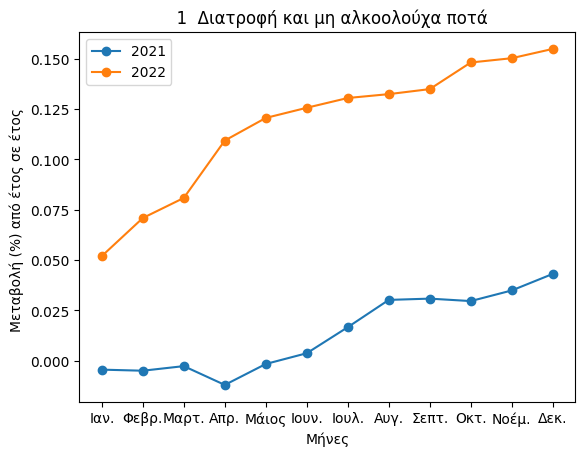

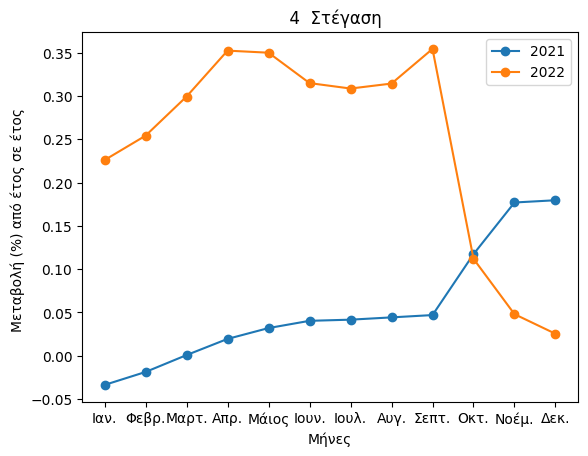

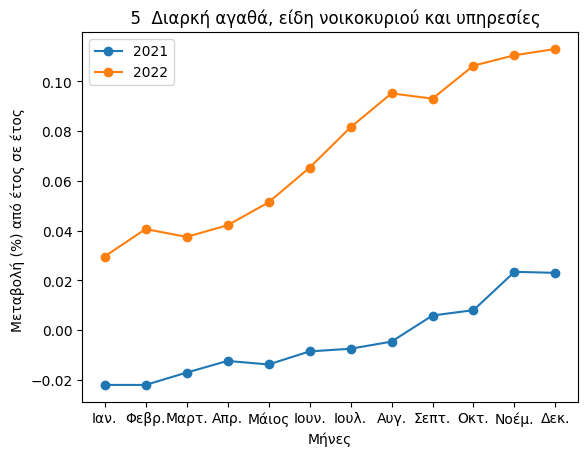

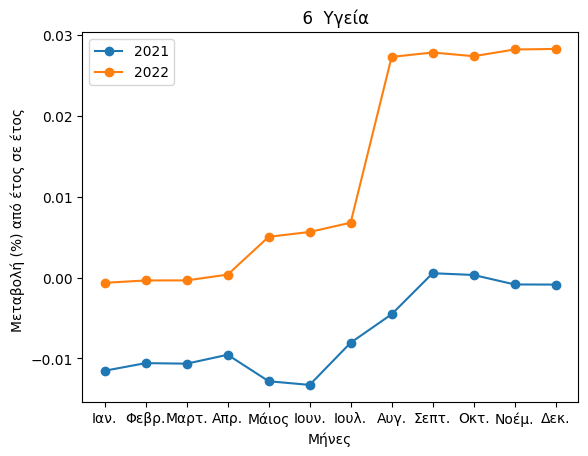

In [23]:
#Line chart
categories = [0, 3, 4, 5] # Οι κατηγροίες που μας ενδιαφέρουν (τα indexes)
for cat in categories:
    data21=df_pct.iloc[12:24, cat] # φιλτράρισμα του έτους 2021
    index_21= list(data21.index) # εξαγωγή του index της ΣΕΙΡΑΣ data21 για να μετονομαστεί χωρίς το έτος
    for i in range(12):
        index_21[i] = index_21[i][:-2]
    data21.index = index_21 # Μετονομασία του index του data21
    data22=df_pct.iloc[24:36, cat] # φιλτράρισμα του έτους 2022
    index_22= list(data22.index)
    for i in range(12):
        index_22[i] = index_22[i][:-2]
    data22.index = index_22
    plt.plot(data21, 'o-')
    plt.plot(data22, 'o-')
    plt.xlabel('Μήνες')
    plt.ylabel('Μεταβολή (%) από έτος σε έτος ')
    plt.legend(['2021', '2022'])
    plt.title(list(df_pct.columns)[cat])
    plt.savefig('Image_pct_'+str(cat+1)+'.png', dpi=300) #  αποθήκευση σε εικόνα (default=.png)
    plt.show() # reset ώστε κάθε διάγραμμα να είναι σε νέους άξονες

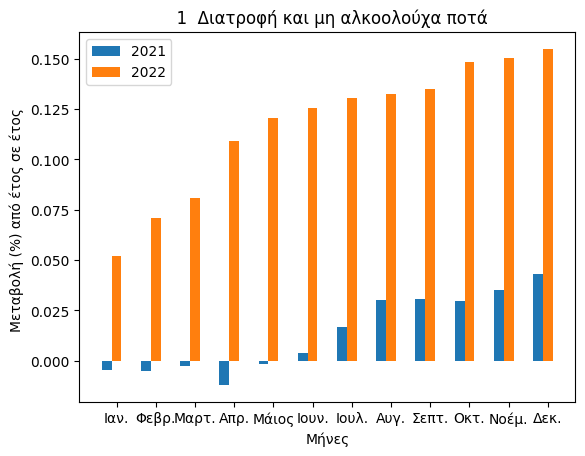

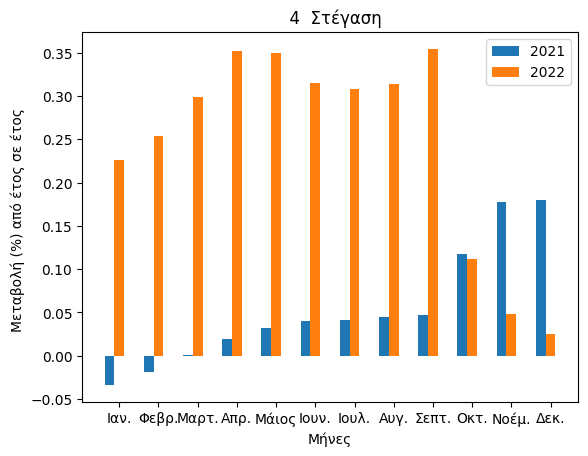

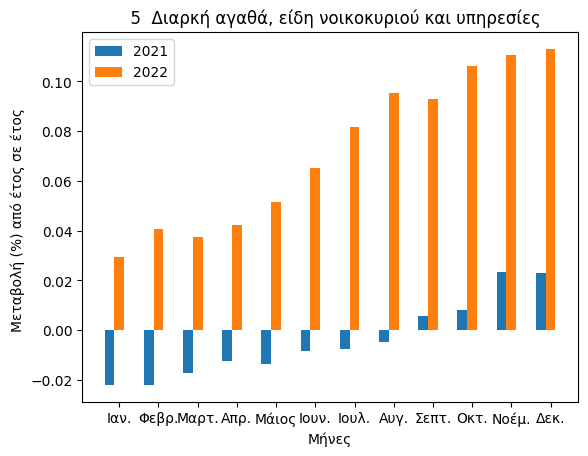

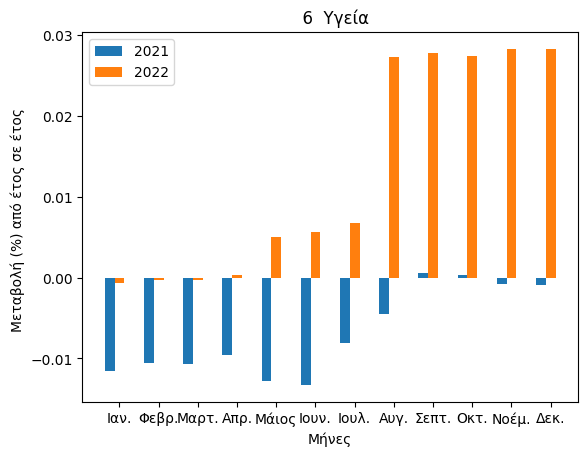

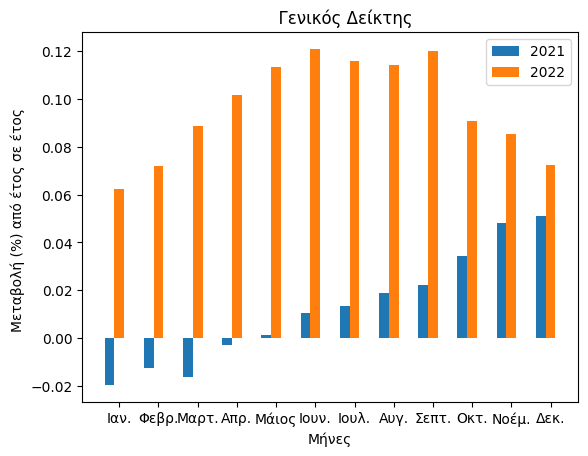

In [24]:
# Δημιουργία ραβδογραμμάτων
categories = [0, 3, 4, 5, 12] # Οι κατηγορίες που μας ενδιαφέρουν (τα indexes)
for cat in categories:
    data21=df_pct.iloc[12:24, cat] # φιλτράρισμα του έτους 2021
    index_21= list(data21.index) # εξαγωγή του index της ΣΕΙΡΑΣ data21 για να μετονομαστεί χωρίς το έτος
    for i in range(12):
        index_21[i] = index_21[i][:-2]
    data21.index = index_21 # Μετονομασία του index του data21
    data22=df_pct.iloc[24:36, cat] # φιλτράρισμα του έτους 2022
    index_22= list(data22.index)
    for i in range(12):
        index_22[i] = index_22[i][:-2]
    data22.index = index_22
    X = np.arange(12)
    plt.bar(X, data21.values, width=0.25) #πλάτος μπάρας
    plt.bar(X+0.25, data22.values, width=0.25)
    plt.xticks([r + 0.25 for r in range(12)],data21.index) #να μου τυπώσει τους μήνες όχι νούμερα
    plt.xlabel('Μήνες')
    plt.ylabel('Μεταβολή (%) από έτος σε έτος ')
    plt.legend(['2021', '2022'])
    plt.title(list(df_pct.columns)[cat])
    plt.savefig('Image_pct_BAR_'+str(cat+1)+'.png', dpi=300) #  αποθήκευση σε εικόνα (default=.png)
    plt.show() # reset ώστε κάθε διάγραμμα να είναι σε νέους άξονες